In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd gdrive/My\ Drive/research/superres/stylegan-encoder

/content/gdrive/My Drive/research/superres/stylegan-encoder


In [0]:
!git add .

In [0]:
!git config --global user.email "sachit.menon@duke.edu"

In [0]:
!git config --global user.name "sachit-menon"

In [8]:
!git commit -m "added nonperceptual loss"

[master 3c2e726] added nonperceptual loss
 69 files changed, 88 insertions(+), 248 deletions(-)
 mode change 100755 => 100644 LICENSE.txt
 delete mode 100644 Play_with_latent_directions.ipynb
 mode change 100755 => 100644 README.md
 create mode 100644 __pycache__/config.cpython-36.pyc
 create mode 100644 aligned_realpics/LR/chicagoLR.png
 create mode 100644 aligned_realpics/ObamaHR_01.png
 create mode 100644 aligned_realpics/chicago1_01.png
 create mode 100644 aligned_realpics/chicagoLR_256.png
 create mode 100644 aligned_realpics/chicagoLR_64.png
 create mode 100644 aligned_realpics/chicagoLR_bilinear.png
 create mode 100644 cache/263e666dc20e26dcbfa514733c1d1f81_karras2019stylegan-ffhq-1024x1024.pkl
 mode change 100755 => 100644 config.py
 mode change 100755 => 100644 dataset_tool.py
 mode change 100755 => 100644 dnnlib/__init__.py
 create mode 100644 dnnlib/__pycache__/__init__.cpython-36.pyc
 create mode 100644 dnnlib/__pycache__/util.cpython-36.pyc
 mode change 100755 => 100644 dn

In [0]:
!git config credential.https://github.com.username sachit-menon

In [14]:
!git push

fatal: could not read Password for 'https://sachit-menon@github.com': No such device or address


In [0]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

ValueError: ignored

In [0]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [0]:
# Loading already learned representations
donald_trump = np.load('ffhq_dataset/latent_representations/donald_trump_01.npy')
hillary_clinton = np.load('ffhq_dataset/latent_representations/hillary_clinton_01.npy')

# Of course you can learn your own vectors using two scripts

# 1) Extract and align faces from images
# python align_images.py raw_images/ aligned_images/

# 2) Find latent representation of aligned images
# python encode_images.py aligned_images/ generated_images/ latent_representations/

In [0]:
!python align_images.py ../styleganSR/realpics/ ./aligned_realpics/

Using TensorFlow backend.


In [0]:
!mkdir generated_images latent_representations

mkdir: cannot create directory ‘generated_images’: File exists
mkdir: cannot create directory ‘latent_representations’: File exists


In [1]:
!ls

sample_data


In [14]:
!python encode_images.py ./aligned_realpics/LR/ generated_images/ latent_representations/ --image_size 16 --lr 1

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
  0% 0/1 [00:00<?, ?it/s]
  0% 0/1000 [00:00<?, ?it/s]WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.

chicagoLR Loss: 0.52:   0% 0/1000 [00:04<?, ?it/s]
chicagoLR Loss: 0.52:   0% 1/1000 [00:04<1:14:10,  4.46s/it]
chicagoLR Loss: 0.42:   0% 1/1000 [00:04<1:14:10,  4.46s/it]
chicagoLR Loss: 0.42:   0% 2/1000 [00:04<52:40,  3.17s/it]  
chicagoLR Loss: 0.37:   0% 2/1000 [00:04<52:40,  3.17s/it]
chicagoLR Loss: 0.37:   0% 3/1000 [00:04<37:37,  2.26s/it]
chicagoLR Loss: 0.32:   0% 3/1000 [00:04<37:37,  2.26s/it]
chicagoLR Loss: 0.32:   0% 4/1000 [00:04<27:05,  1.63s/it]
chicagoLR Loss: 0.29:   0% 4/1000 [00:05<27:05,  1.63s/it]
chicagoLR Loss: 0.29:   0% 5/1000 [00:05<19:43,  1.19s/it]
chicag

In [0]:
!mv aligned_realpics/

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Loading already learned representations
# obama = np.load('latent_representations/ObamaHR_01.npy')
chicagolr = np.load('latent_representations/chicagoLR.npy')

In [0]:
import scipy.misc

In [8]:
scipy.misc.imsave('./aligned_realpics/LR/chicagoLR.png', scipy.misc.imresize(scipy.misc.imread('./aligned_realpics/chicago1_01.png'), (16,16), interp='bicubic'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [0]:
chicagolr.shape

(18, 512)

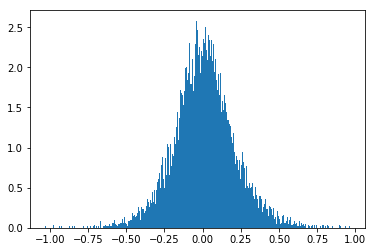

In [0]:
plt.hist(chicagolr.flatten(), bins=300, density=True);

In [153]:
chicago_lrim = scipy.misc.imread('./aligned_realpics/LR/chicagoLR.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [0]:
!ls 

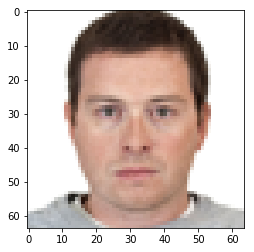

In [154]:
plt.imshow(chicago_lrim)

In [155]:
chicago_srim = scipy.misc.imread('./generated_images/chicagoLR.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


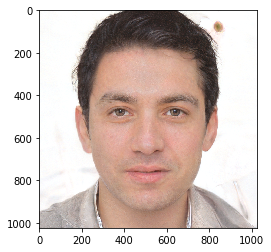

In [156]:
plt.imshow(chicago_srim)

In [159]:
chicago_srdsim = scipy.misc.imresize(chicago_srim, size=(64,64), interp='bicubic')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


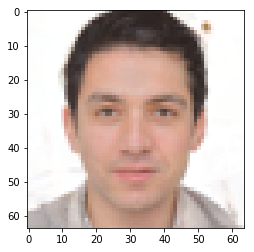

In [160]:
plt.imshow(chicago_srdsim)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


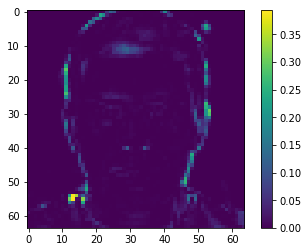

In [162]:
plt.imshow(np.square(scipy.misc.imresize(chicago_srim, size=(64,64), interp='bicubic')/255. - chicago_lrim/255.)[:,:,1])
plt.colorbar()

In [164]:
np.abs(scipy.misc.imresize(chicago_srim, size=(64,64), interp='bicubic')[0]/255. - chicago_lrim[0]/255.).sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


7.470588235294118

In [69]:
from keras.applications.vgg16 import preprocess_input


Using TensorFlow backend.


In [70]:
preprocess_input(chicago_lrim)

array([[[151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ],
        ...,
        [151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ]],

       [[151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ],
        ...,
        [151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ]],

       [[151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ],
        ...,
        [151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ],
        [151.061  , 138.22101, 131.32   ]],

       ...,

       [[ 84.061  ,  68.221  ,  55.32   ],
        [ 87.061  ,  70.221  ,  57.32   ],
        [ 87.061  ,  70.221  ,  57.32   ],
        ...,
        [ 84.061  ,  71.22

In [0]:
# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')

# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

# Smile transformation

In [0]:
donald_trump.shape

(18, 512)

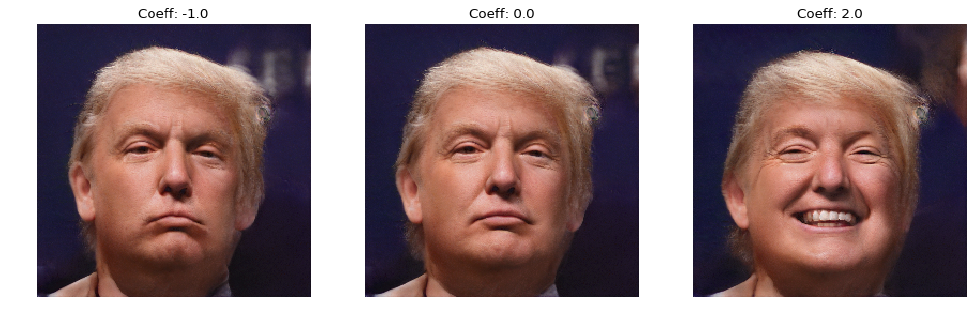

In [0]:
move_and_show(donald_trump, smile_direction, [-1, 0, 2])

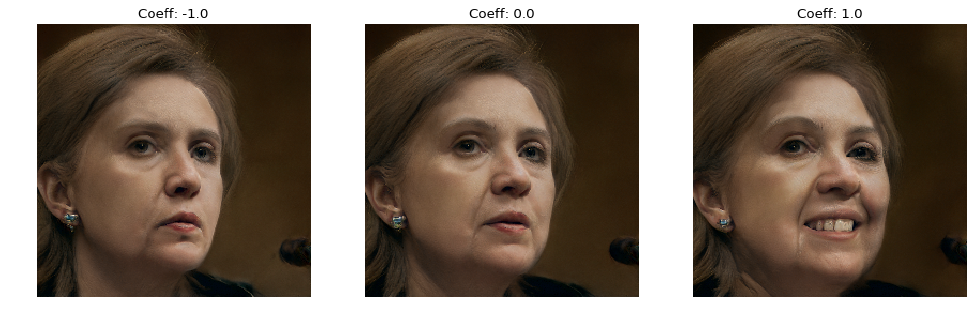

In [0]:
move_and_show(hillary_clinton, smile_direction, [-1, 0, 1])

# Gender transformation

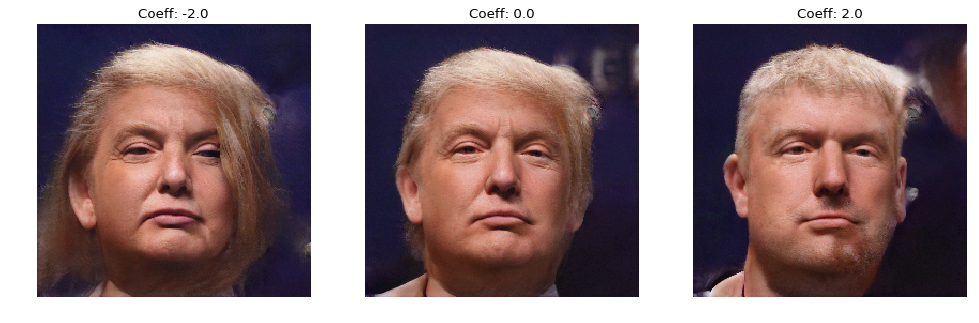

In [0]:
move_and_show(donald_trump, gender_direction, [-2, 0, 2])

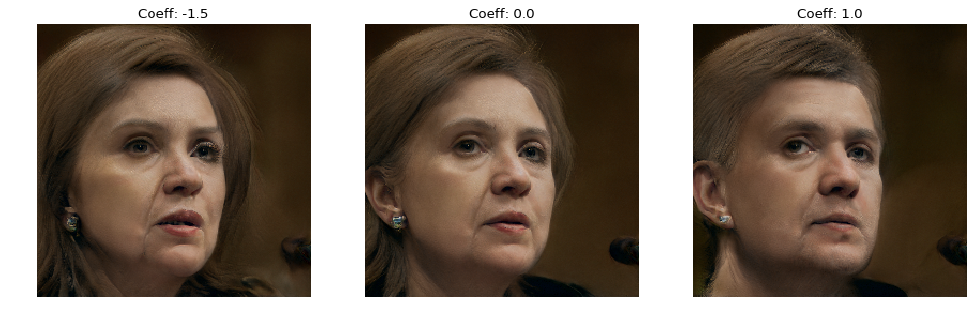

In [0]:
move_and_show(hillary_clinton, gender_direction, [-1.5, 0, 1.])

# Age transformation

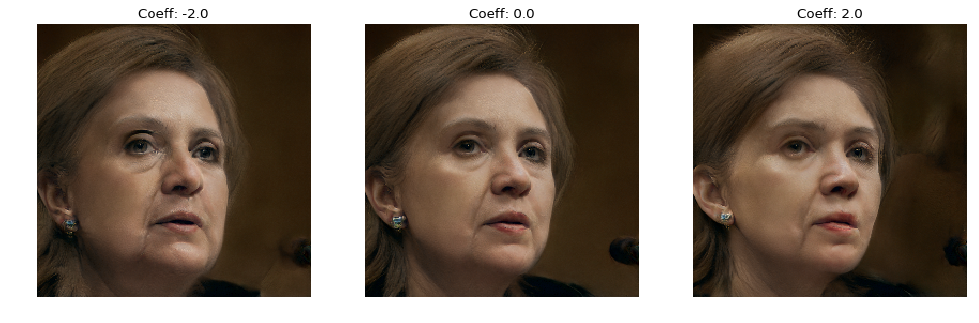

In [0]:
move_and_show(hillary_clinton, age_direction, [-2, 0, 2])

In [0]:
# try it yourself!
move_and_show(donald_trump, age_direction, [-3, 0, 1])